In [ ]:
#In my capstone project, I wanted to analyze hotel booking data to determine the likelihood of hotel booking will be canceled prior to check in. 
#For the dataset, I will be using the Hotel Booking dataset from Kaggle. 
#This dataset has ~ 120K rows of entry, which is a good significant amount of data to perform analysis.
#This dataset contains various of columns, including a flag column for is Canceled. 
#I will be able to use the characteristic of selected columns to build a ML model to make prediction on the likelihood of a booking cancellation. 


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
hotel_booking = pd.read_csv('C:/Users/YST PC/Documents/Berkeley Cert/Capstone Project/dataset/hotel_bookings.csv')

In [5]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Handle Missing Values

In [15]:
hotel_booking['children'].fillna(0, inplace=True)
hotel_booking['country'].fillna(hotel_booking['country'].mode()[0], inplace=True)
hotel_booking['agent'].fillna(0, inplace=True)
hotel_booking.drop(columns=['company'], inplace=True)  # too many missing values

In [17]:
# Basic computations

In [19]:
#Compute Total Nights
hotel_booking['total_nights'] = hotel_booking['stays_in_weekend_nights'] + hotel_booking['stays_in_week_nights']

#Compute Arrival Date
hotel_booking['arrival_date'] = pd.to_datetime(hotel_booking['arrival_date_year'].astype(str) + '-' +
                                    hotel_booking['arrival_date_month'] + '-' +
                                    hotel_booking['arrival_date_day_of_month'].astype(str),
                                    errors='coerce')

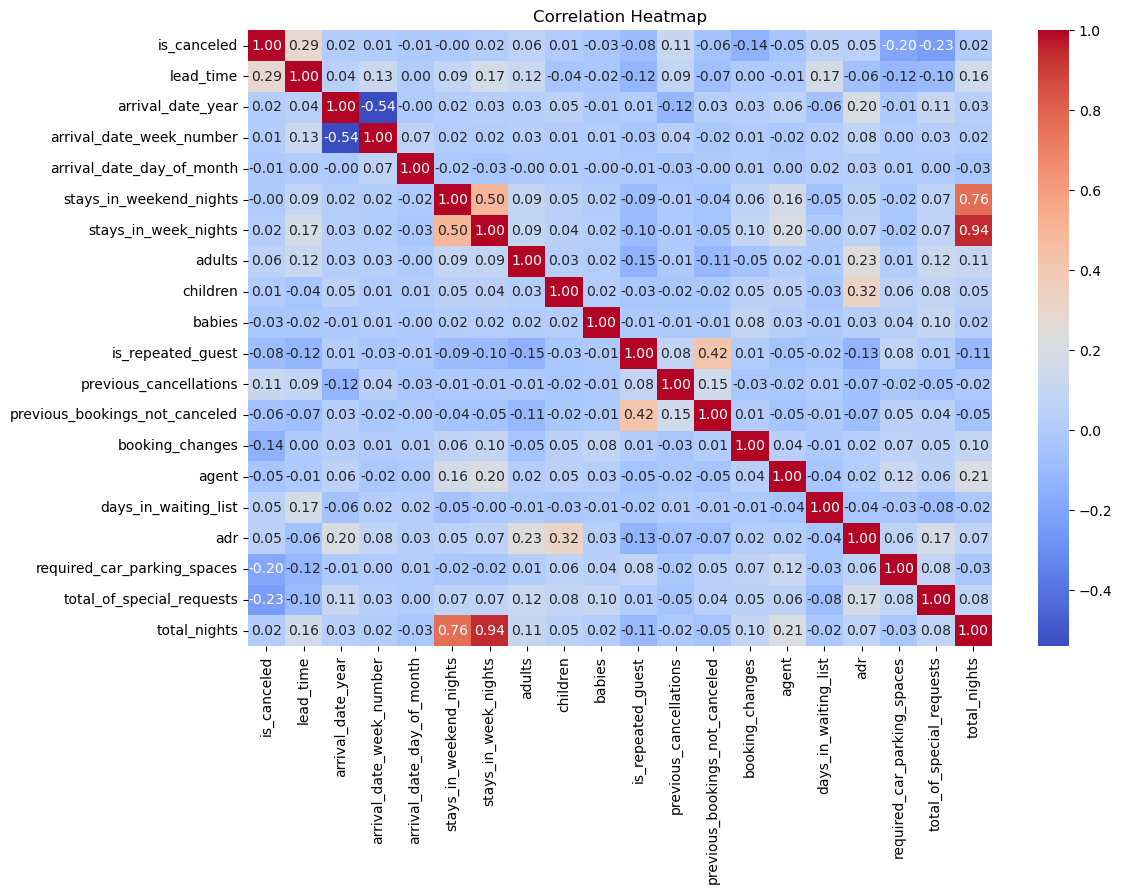

In [33]:
# Build a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hotel_booking.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [29]:
# Explaination
# 1. lead_time and is_canceled: Strong positive correlation
    # Meaning: Bookings made far in advance (lead_time) are more likely to be canceled.
    # Business insight: Long-term planners are less committed or more likely to change plans.

# 2. previous_cancellations and is_canceled: Positive correlation
    # Meaning: Guests who have canceled in the past are more likely to cancel again.
    # This can be use to track repeat cancellers and consider restrictions or incentives.

# 3. total_of_special_requests and is_canceled: Negative correlation
    # Meaning: Guests with more special requests are less likely to cancel.


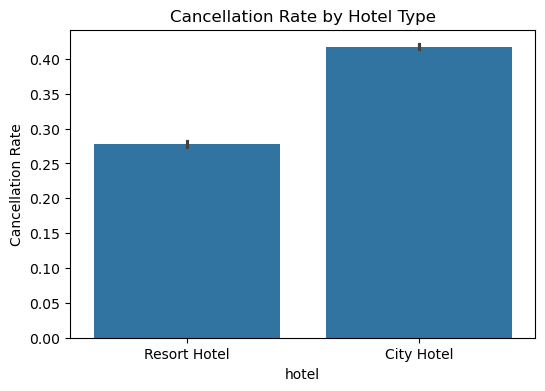

In [31]:
# 5. Compute Cancellation Rate by Hotel Type

plt.figure(figsize=(6, 4))
sns.barplot(x='hotel', y='is_canceled', data=hotel_booking)
plt.title('Cancellation Rate by Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

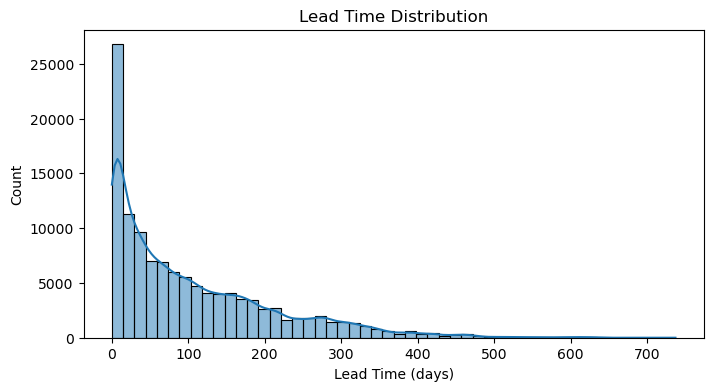

In [35]:
# Lead Time Distribution

plt.figure(figsize=(8, 4))
sns.histplot(hotel_booking['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.show()

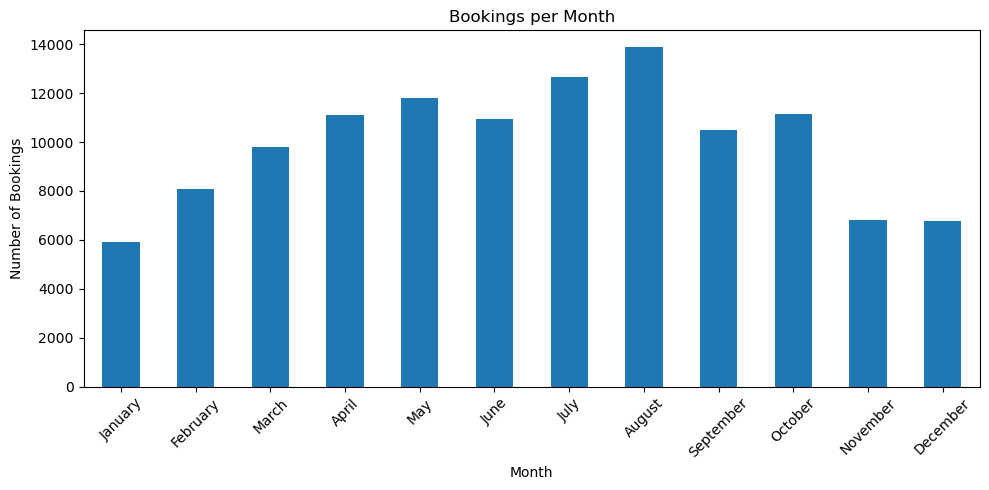

In [53]:
# Optional: Compute Booking per Month 
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = hotel_booking['arrival_date_month'].value_counts().reindex(month_order)

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar')
plt.title('Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Business Insight

# 37% of bookings are canceled overall.
# City Hotels face a higher cancellation rate (~41%) compared to Resort Hotels (~28%).
# Long lead times significantly increase the likelihood of cancellation.
# Guests with past cancellations or frequent booking changes are more likely to cancel again.
# Bookings with special requests or parking needs are less likely to cancel


In [47]:
# Modeling 

# Logistic Regression: Easy to train model. Handeling binary classification 

# other consideration: use decision tree to capture non-linear pattern

In [49]:
# Implement Logistic Regression

In [55]:
# Step 1: Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Select features and target
features = ['lead_time', 'total_of_special_requests', 'previous_cancellations',
            'booking_changes', 'deposit_type', 'customer_type',
            'market_segment', 'hotel']
target = 'is_canceled'

X = hotel_booking[features]
y = hotel_booking[target]

# Step 3: Identify numeric and categorical features
numeric_features = ['lead_time', 'total_of_special_requests',
                    'previous_cancellations', 'booking_changes']
categorical_features = ['deposit_type', 'customer_type',
                        'market_segment', 'hotel']

# Step 4: Build preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Step 5: Build full pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Train the model
pipeline.fit(X_train, y_train)

# Step 8: Make predictions and evaluate
y_pred = pipeline.predict(X_test)

# Step 9: Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.79755423402295

Confusion Matrix:
 [[14283   750]
 [ 4084  4761]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86     15033
           1       0.86      0.54      0.66      8845

    accuracy                           0.80     23878
   macro avg       0.82      0.74      0.76     23878
weighted avg       0.81      0.80      0.78     23878



In [ ]:
# About 80% of the time, the model correctly predicted whether a booking would be canceled or not.
# Confusion Matrix: 
    # True Positives (TP): Model correctly predicted cancellations (4761 times)
    # False Negatives (FN): Model missed cancellations (4084 times)
# Classification Report:
    # Class 0 – Not Canceled:
        # Precision (0.78): Of all bookings the model predicted as not canceled, 78% were actually not canceled.
        # Recall (0.95): Of all bookings that were truly not canceled, 95% were correctly identified.
        # F1-score (0.86): High score reflects strong model performance on this class.
     # Class 1 – Canceled:
        # Precision (0.86): When the model predicts a booking will cancel, it's correct 86% of the time.
        # Recall (0.54): But it only catches 54% of actual cancellations — meaning it misses nearly half of them.
        # F1-score (0.66): Moderate balance between precision and recall.
